In [24]:
from sklearn.linear_model import LinearRegression
#Training the Simple Linear Regression model on the Training set
model = LinearRegression(normalize=True)

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [25]:
model.fit(X,y)

LinearRegression(normalize=True)

In [26]:
#Predicting the Test set results
y_pred = model.predict(X)

In [27]:
from sklearn.metrics import r2_score,mean_squared_error

score = r2_score(y,y_pred)
print("Score of Training:",100*score)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))

Score of Training: 56.33267069746055
RMSE : 1128


In [28]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(model,X, y, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 28.92
RMSE : 1128
CV Score : Mean - 1129 | Std - 42.62 | Min - 1075 | Max - 1208


In [29]:
model.coef_

array([ 7.59621340e-01, -1.63013748e+00,  9.68752740e+02,  6.42432625e+14,
        2.39868917e+15,  3.88740975e+01,  1.49769646e+16,  4.44032299e+15,
        9.50808600e+15, -8.13284509e+15, -9.78551229e+15, -8.37176495e+15,
       -9.32521304e+15,  1.87205558e+01, -2.39868917e+15,  8.08231234e+14,
       -6.02271719e+13, -8.42473018e+15,  3.44235321e+15, -9.31368782e+15,
       -2.90527890e+14, -4.44061703e+14,  1.41490684e+16, -3.33832890e+15])

<AxesSubplot:title={'center':'Model Coefficients'}>

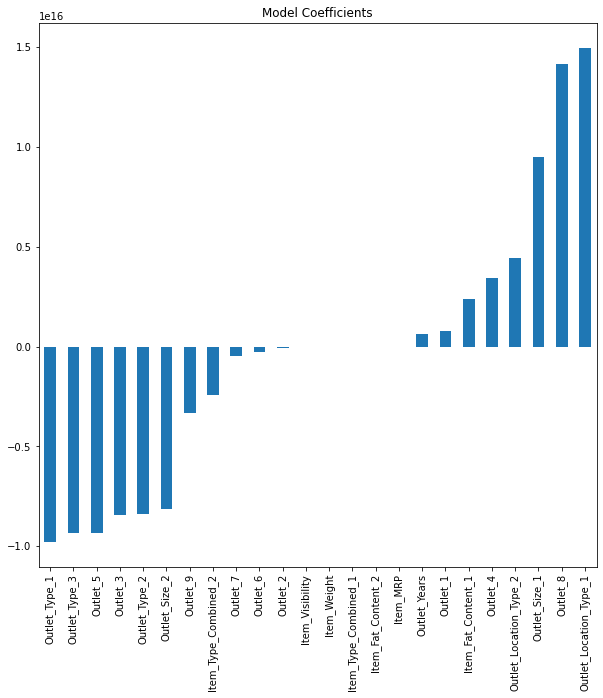

In [30]:
coef2 = pd.Series(model.coef_ ,X.columns).sort_values()
plt.figure(figsize = (10,10))
coef2.plot(kind='bar', title='Model Coefficients')

# Regularized Linear Regression
___________________________________________________________________________________________________________________________

# Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0.05,normalize=True)

In [32]:
model_ridge.fit(X, y)

Ridge(alpha=0.05, normalize=True)

In [33]:
#Predicting the Test set results
y_pred = model_ridge.predict(X)

In [34]:
score = r2_score(y,y_pred)
print("Score of Training:",100*score)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))

Score of Training: 56.09227723010813
RMSE : 1131


In [35]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(model,X, y, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 28.93
RMSE : 1131
CV Score : Mean - 1129 | Std - 42.62 | Min - 1075 | Max - 1208


<AxesSubplot:title={'center':'Model Coefficients'}>

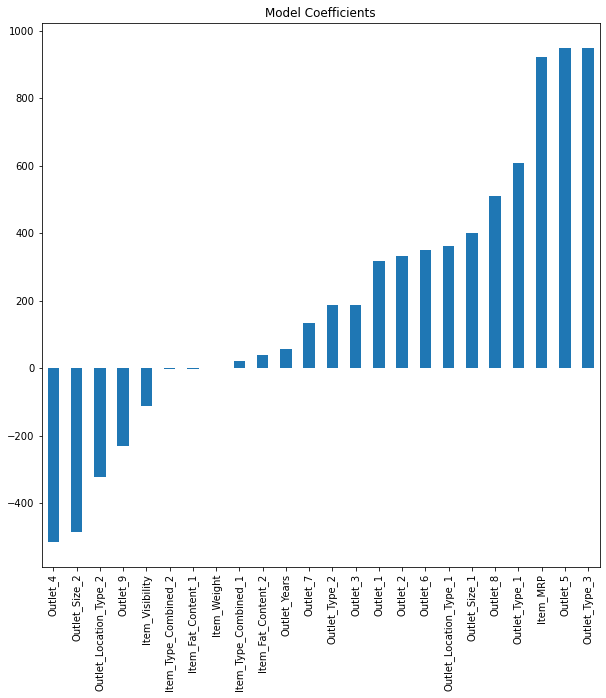

In [36]:
coef2 = pd.Series(model_ridge.coef_ ,X.columns).sort_values()
plt.figure(figsize = (10,10))
coef2.plot(kind='bar', title='Model Coefficients')

In [ ]:
import pickle

with open('linearRegressionModel.pkl', 'wb') as pkl:
    pickle.dump(model, pkl)
